In [274]:
%matplotlib inline
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

In [275]:
def get_url(page: int) -> str:
    """get_url returns the url for the given page

    :param page: Page number that we want to get the url for
    :type page: int
    :return: formats the url for the given page
    """
    url = f'https://www.celio.com/Nouvelle-collection/c/FR_NOUVELLECOLLECTION?q=%3Arelevance%3Adepartment%3A0310&page={page}'
    return url



1- Récupérer pour la première page la liste des produits , le nom, le prix .

In [276]:

item_names = []
item_prices = []
ratings = []
for i in range(1,3):
    url = get_url(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    elements = soup.find_all("div", {"class":  "ec_card__description"})
    for item in elements:
        item_name= item.find('div', {"class": "ec_card__label"}).text
        item_names.append(item_name)
        item_price = item.find('div', {"class": "ec_card__price c-price c-product-v2_price"}).text
        item_prices.append(item_price)
print(len(item_names))
print(item_prices)

70
[' 25,99 € ', ' 25,99 € ', ' 25,99 € ', ' 25,99 € ', ' 25,99 € ', ' 29,99 € ', ' 29,99 € ', ' 39,99 € ', ' 25,99 € ', ' 29,99 € ', ' 29,99 € ', ' 29,99 € ', ' 39,99 € ', ' 39,99 € ', ' 25,99 € ', ' 35,99 € ', ' 39,99 € ', ' 39,99 € ', ' 39,99 € ', ' 29,99 € ', ' 39,99 € ', ' 29,99 € ', ' 29,99 € ', ' 39,99 € ', ' 29,99 € ', ' 29,99 € ', ' 29,99 € ', ' 39,99 € ', ' 39,99 € ', ' 29,99 € ', ' 29,99 € ', ' 29,99 € ', ' 39,99 € ', ' 39,99 € ', ' 25,99 € ', ' 29,99 € ', ' 35,99 € ', ' 29,99 € ', ' 39,99 € ', ' 29,99 € ', ' 25,99 € ', ' 29,99 € ', ' 25,99 € ', ' 25,99 € ', ' 35,99 € ', ' 29,99 € ', ' 39,99 € ', ' 35,99 € ', ' 35,99 € ', ' 45,99 € ', ' 29,99 € ', ' 29,99 € ', ' 29,99 € ', ' 29,99 € ', ' 49,99 € ', ' 49,99 € ', ' 39,99 € ', ' 29,99 € ', ' 39,99 € ', ' 29,99 € ', ' 29,99 € ', ' 39,99 € ', ' 29,99 € ', ' 29,99 € ', ' 29,99 € ', ' 39,99 € ', ' 29,99 € ', ' 25,99 € ', ' 29,99 € ', ' 29,99 € ']


Etendre la question 1 pour les 2 pages du site

3- Suite à ce filtre (toutes les pages confondues) combien de produits affichants l’étiquette “meilleur
prix” , afficher les triés par prix croissant.

In [277]:

def generate_item_url(item) -> str:
    """geerate_item_url returns the url for the item"""
    
    item_category= item['data-ota-productnavcategorylevel1']
    item_id = item['data-ota-productlevel1id']
    item_name = item['data-ota-productlevel2name']
    for r in ((' ', '-'), ("%", ""), ("/", ""), (".", ""), ("&", ""), ("é", "e"), ("è", "e"), ("à", "a"), ("ç", "c"), ("ê", "e"), ("î", "i"), ("ô", "o"), ("û", "u"), ("ù", "u"), ("ü", "u"), ("ÿ", "y"), ("ñ", "n")):
        item_name = item_name.replace(*r)
        
    url = f'https://www.celio.com/{item_category}/{item_name}/p/{item_id}'
    return url 

In [288]:
DataFrame = pd.DataFrame

def get_best_items() -> DataFrame:
    """get_best_items returns the items with the tag meilleur prix
    :return: DataFrame with the best items
    :rtype: DataFrame
    """
    
    items_names = []
    items_prices = []
    items_urls = []
    items_ids = []
    for i in range(1,3):
        url = get_url(i)
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        elements = soup.find_all("div", {"class":  "ec_card c-product-v2 c-list-product-v2 c-js-click c-ota-product ec_single_card ec_is_single"})
        elements += soup.find_all('div', {"class": "ec_card c-product-v2 c-list-product-v2 c-js-click c-ota-product ec_duo_card ec_is_single"})
        for item in elements:
            if 'Meilleur prix' in item.text:
                
                url_item  = generate_item_url(item)
                items_urls.append(url_item)
                items_ids.append(item['data-ota-productlevel1id'])
                item_name= item.find('div', {"class": "ec_card__label"}).text
                items_names.append(item_name)
                item_price = item.find('div', {"class": "ec_card__price c-price c-product-v2_price"}).text
                items_prices.append(float(item_price.replace('€','').replace(' ','').replace(',','.')))

            response = {"ID": items_ids, 'Product name': items_names, 'Price': items_prices, 'URL': items_urls}
            df = pd.DataFrame(response)
            df.sort_values(by='Price', ascending=True)
            
    return df


In [290]:
df = get_best_items()
df

,ID,Product name,Price,URL
0,1049665,Chemise slim coton stretch,25.99,https://www.celio.com/03-10-shirt/Chemise-slim...
1,1049388,Chemise slim coton stretch,25.99,https://www.celio.com/03-10-shirt/Chemise-slim...
2,1049770,Chemise slim coton stretch,25.99,https://www.celio.com/03-10-shirt/Chemise-slim...
3,1047257,Chemise slim coton stretch,25.99,https://www.celio.com/03-10-shirt/Chemise-slim...
4,1067751,Chemise slim coton stretch,25.99,https://www.celio.com/03-10-shirt/Chemise-slim...
5,1059935,Chemise slim coton stretch,25.99,https://www.celio.com/03-10-shirt/Chemise-slim...


4- Trouver pour ces articles ,meilleurs prix, les 5 les mieux notés , ayant le plus d’avis.

In [282]:
from requests_html import HTMLSession

def get_note():
    for url in df['URL']:
        session = HTMLSession()
        r = session.get(url)
        print(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        rating = soup.find_all('p', {"class": "netreviews_note_generale"})
        #rating.find_all('netreviews_global_rating')
        print(rating)
        print('====================')
get_note()

https://www.celio.com/03-10-shirt/Chemise-slim-coton-stretch/p/1049665
[]
https://www.celio.com/03-10-shirt/Chemise-slim-coton-stretch/p/1049388
[]
https://www.celio.com/03-10-shirt/Chemise-slim-coton-stretch/p/1049770
[]
https://www.celio.com/03-10-shirt/Chemise-slim-coton-stretch/p/1047257
[]
https://www.celio.com/03-10-shirt/Chemise-slim-coton-stretch/p/1067751
[]
https://www.celio.com/03-10-shirt/Chemise-slim-coton-stretch/p/1059935
[]


In [284]:
def get_all_items() -> list: 
    item_names = []
    item_prices = []
    items_urls = []
    items_ids = []
    for i in range(1,3):
        url = get_url(i)
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        elements = soup.find_all("div", {"class":  "ec_card c-product-v2 c-list-product-v2 c-js-click c-ota-product ec_single_card ec_is_single"})
        elements += soup.find_all('div', {"class": "ec_card c-product-v2 c-list-product-v2 c-js-click c-ota-product ec_duo_card ec_is_single"})
        for item in elements:
            items_ids.append(item['data-ota-productlevel1id'])
            url_item  = generate_item_url(item)
            items_urls.append(url_item)
            item_name= item.find('div', {"class": "ec_card__label"}).text
            item_names.append(item_name)
            item_price = item.find('div', {"class": "ec_card__price c-price c-product-v2_price"}).text
            item_prices.append(float(item_price.replace('€','').replace(' ','').replace(',','.')))
            response = {"ID": items_ids,'Product name': item_names, 'Price': item_prices, 'URL': items_urls}
            df = pd.DataFrame(response)
            df.sort_values(by='Price', ascending=True)
            
    return df

In [285]:

df_all = get_all_items()
df_all

,ID,Product name,Price,URL
0,1049665,Chemise slim coton stretch,25.99,https://www.celio.com/03-10-shirt/Chemise-slim...
1,1049388,Chemise slim coton stretch,25.99,https://www.celio.com/03-10-shirt/Chemise-slim...
2,1049770,Chemise slim coton stretch,25.99,https://www.celio.com/03-10-shirt/Chemise-slim...
3,1047257,Chemise slim coton stretch,25.99,https://www.celio.com/03-10-shirt/Chemise-slim...
4,1106364,Chemise regular 100% lin,29.99,https://www.celio.com/03-10-shirt/Chemise-regu...
...,...,...,...,...
65,1060032,Chemise slim repassage facile,39.99,https://www.celio.com/03-10-shirt/Chemise-slim...
66,1104009,Chemise modern fit à carreaux 100% coton,29.99,https://www.celio.com/03-10-shirt/Chemise-mode...
67,1107069,Chemise regular 100% coton,29.99,https://www.celio.com/03-10-shirt/Chemise-regu...
68,1082092,Chemise slim repassage facile,39.99,https://www.celio.com/03-10-shirt/Chemise-slim...


<AxesSubplot:xlabel='Price', ylabel='Product name'>

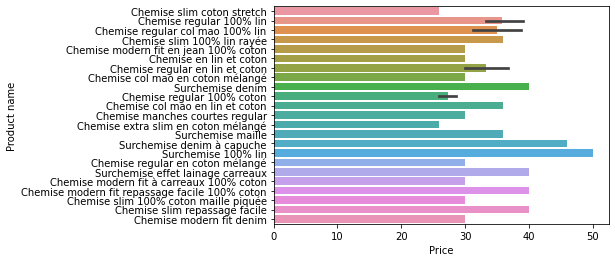

In [286]:
import seaborn as sns
sns.barplot(x='Price', y='Product name', data=df_all)